In [ ]:
from google.colab import files
files.upload()

In [1]:
import pandas as pd
df = pd.read_csv('Eventos_ofertas_51.csv', sep=';')

In [6]:
###print(df.dtypes)
df.head()

,Cliente,Creditos,Tipo_papel,Mes,Ano,Oferta_compativel,Compra_feita
0,1728,"28341,51",21,6,2022,1,0
1,1728,"27898,14",21,12,2022,1,0
2,1821,"619,00",60,3,2022,0,0
3,1821,"364,32",60,8,2022,0,0
4,1821,"1048,96",60,9,2022,0,0


In [2]:
df['Creditos'] = df['Creditos'].str.replace(',','.')
print (df['Creditos'])
df['Creditos'] = df['Creditos'].astype(float)
print (df['Creditos'])

0         28341.51
1         27898.14
2           619.00
3           364.32
4          1048.96
            ...   
260151      211.04
260152      285.53
260153      216.85
260154      547.96
260155      211.74
Name: Creditos, Length: 260156, dtype: object
0         28341.51
1         27898.14
2           619.00
3           364.32
4          1048.96
            ...   
260151      211.04
260152      285.53
260153      216.85
260154      547.96
260155      211.74
Name: Creditos, Length: 260156, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Oferta_compativel')

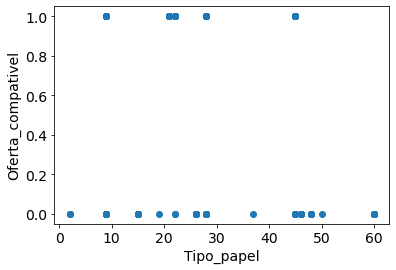

In [7]:
### Papéis com ofertas ativas.
plt.rcParams.update({'font.size': 14})
plt.scatter(df['Tipo_papel'], df['Oferta_compativel'])
plt.xlabel('Tipo_papel')
plt.ylabel('Oferta_compativel')


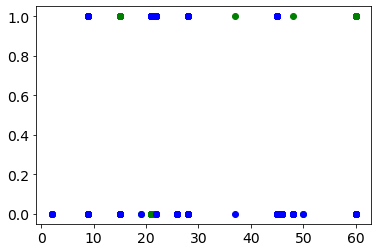

In [9]:
### Compra de papéis influenciados por ofertas.
x = df['Tipo_papel']
y = df['Compra_feita']
z = df['Oferta_compativel']

plt.plot(x, y, 'go')
plt.plot(x, z, 'bo')
plt.show()


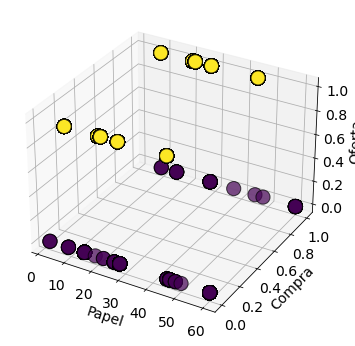

In [10]:
from mpl_toolkits.mplot3d import Axes3D

x = df['Tipo_papel']
y = df['Compra_feita']
z = df['Oferta_compativel']
 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
ax.set_xlabel('Papel')
ax.set_ylabel('Compra')
ax.set_zlabel('Oferta')
plt.show()

Normalização da base de dados

In [37]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(df)
df_normalizado = scaler.transform(df)
print(df_normalizado)

[[-1.50741325e+00  1.59297475e-03 -5.75737234e-01 ...  0.00000000e+00
   2.03692219e-01 -3.71604669e-01]
 [-1.50741325e+00  1.43647442e-03 -5.75737234e-01 ...  0.00000000e+00
   2.03692219e-01 -3.71604669e-01]
 [-1.50741296e+00 -8.19249104e-03  7.08187373e+00 ...  0.00000000e+00
  -4.90936769e+00 -3.71604669e-01]
 ...
 [ 1.40500175e+00 -8.33444157e-03 -5.75737234e-01 ...  0.00000000e+00
   2.03692219e-01 -3.71604669e-01]
 [ 1.40500175e+00 -8.21756667e-03 -5.75737234e-01 ...  0.00000000e+00
   2.03692219e-01 -3.71604669e-01]
 [ 1.40500175e+00 -8.33624529e-03  7.98705759e-01 ...  0.00000000e+00
   2.03692219e-01 -3.71604669e-01]]


### Funções de ativação

In [12]:
def sigmoid(Soma):
    return 1/(1+np.exp(-Soma))

def relu(Soma):
    return np.maximum(0,Soma)

### Criando a estrutura da rede

In [13]:
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": "relu"},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": "sigmoid"},
]

### Pesos e viés

In [14]:
def inicia_camadas(arquitetura, seed = 14031950):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

### Propagação da rede

In [16]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao == "relu":
        func_ativacao = relu
    elif ativacao == "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [17]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

### Testando a rede

In [23]:
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(1, valores_parametros, arquitetura)

### Atualização dos pesos

In [52]:
def atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradientes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradientes["db" + str(indice_camada)]

    return valores_parametros;

### Função de custo

In [26]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)

### Retropropagação

In [27]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

In [28]:
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [30]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao == "relu":
        func_ativacao_retro = relu_retro
    elif ativacao == "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

###Treinamento

In [32]:
def treino(X, Y, X_teste, Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
       
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 50 == 0):
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
    return valores_parametros, historia_custo, historia_custo_teste

In [117]:
from sklearn.model_selection import train_test_split
X = df[['Compra_feita','Tipo_papel']].values
y = df['Oferta_compativel']

X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.23, random_state=28091974)
print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)

(200320, 2)
(200320,)
(59836, 2)
(59836,)


In [118]:
### Treinamento
valores_parametros, historia_custo, historia_custo_teste = treino( np.transpose(X_treino)
                                                                , np.transpose(y_treino.values.reshape((y_treino.shape[0], 1))) 
                                                                , np.transpose(X_teste)
                                                                , np.transpose(y_teste.values.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 210, 0.01)

Iteração: 00000 - custo: 0.35161 
Iteração: 00050 - custo: 0.18843 
Iteração: 00100 - custo: 0.18836 
Iteração: 00150 - custo: 0.18829 
Iteração: 00200 - custo: 0.18822 


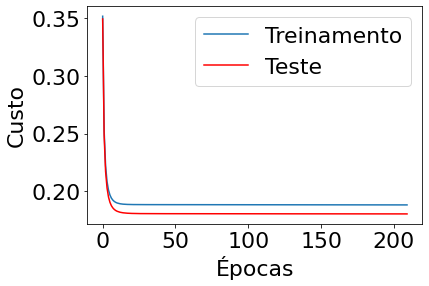

In [119]:
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

### Fazendo Previsões

In [120]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

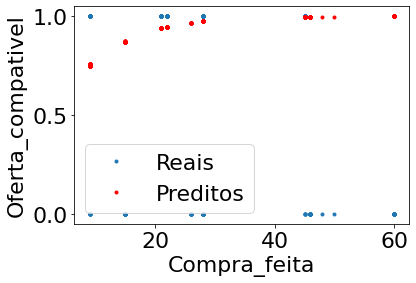

In [121]:
plt.plot(np.transpose(X_teste)[1],np.amax(y)*y_teste,'.')
plt.plot(np.transpose(X_teste)[1],np.amax(y)*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.xlabel('Compra_feita')
plt.ylabel('Oferta_compativel')
plt.show()

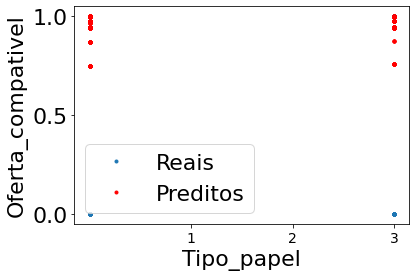

In [122]:
plt.plot(3*np.transpose(X_teste)[0],np.amax(y)*y_teste,'.')
plt.plot(3*np.transpose(X_teste)[0],np.amax(y)*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.xlabel('Tipo_papel')
plt.ylabel('Oferta_compativel')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()

In [123]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [128]:
balanced_accuracy_score(y_teste, np.argmax(np.amax(y)*Y_pred.reshape([-1,1]), axis=1))
# 0.50
###accuracy_score(y_teste, np.argmax(np.amax(y)*Y_pred.reshape([-1,1]), axis=1))
# 0.03
###average_precision_score(y_teste, np.argmax(np.amax(y)*Y_pred.reshape([-1,1]), axis=1))
# 0.96




0.5